# **Basic CNN**

------------------------

### Import Pustaka

In [121]:
import numpy as np
import matplotlib.pyplot as plt

### Data Loading

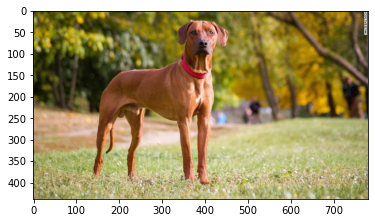

In [122]:
img = plt.imread('201030094143-stock-rhodesian-ridgeback-exlarge-169.jpg')
plt.imshow(img)

Menampilkan gambar yang telah didownload dan telah disimpan dalam folder yang sama dengan project ini

In [123]:
img.shape

(438, 780, 3)

Tahap diatas untuk memunculkan informasi ukuran dari matriks gambar yaitu 438x780 dengan 3 channel warna Red Green Blue (RGB)

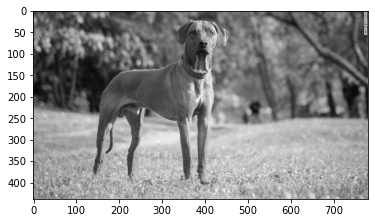

In [124]:
red = img[:,:,0]
green = img[:,:,1]
blue = img[:,:,2]
imgray = 0.2989 * red + 0.5870 * green + 0.1140 * blue
plt.imshow(imgray,cmap='gray')

Tahap diatas adalah pertama memisahkan tiap channel warna lalu mengubah gambar tersebut menjadi grayscale dengan rumus tertentu. Diubah menjadi grayscale agar lebih mudah edge detection

In [125]:
imgray= np.array(imgray)
imgray

array([[ 84.7424,  85.3402,  82.5963, ...,  40.1242,  37.7824,  50.7811],
       [ 75.7433,  75.7433,  74.8852, ...,  38.1244,  55.8946,  28.7833],
       [ 64.2606,  64.7444,  65.1142, ...,  47.7644,  35.8966,  59.905 ],
       ...,
       [150.0395, 143.5671, 134.1659, ..., 136.118 , 135.1181, 131.1185],
       [148.5666, 141.5673, 131.8071, ..., 140.8725, 138.6447, 133.6452],
       [148.7946, 141.7953, 130.7964, ..., 146.1   , 143.1003, 136.101 ]])

Tahap diatas untuk melihat matriks dari gambar yang telah dibuat menjadi grayscale

In [126]:
imgray.shape

(438, 780)

Ukuran dari matriks grayscale masih sama dengan matriks gambar sebelumnya yaitu 438x780

-------------

### Penentuan Gradient

In [127]:
dx,dy = np.gradient(imgray)


Nilai gradien dari x dan y didapatkan dengan menggunakan modul numpy gradient lalu disimpan ke dalam variabel dx dan dy.

Bisa dilihat matriks dx dan dy pada tahap dibawah

In [128]:
dx

array([[ -8.9991 ,  -9.5969 ,  -7.7111 , ...,  -1.9998 ,  18.1122 ,
        -21.9978 ],
       [-10.2409 , -10.2979 ,  -8.74105, ...,   3.8201 ,  -0.9429 ,
          4.56195],
       [ -8.74105,  -8.9991 ,  -7.8852 , ..., 107.22805, -13.8846 ,
         20.1744 ],
       ...,
       [ -0.73645,  -2.2417 ,  -2.67925, ...,   1.9913 ,   1.37735,
          0.8774 ],
       [ -0.62245,  -0.8859 ,  -1.68475, ...,   4.991  ,   3.9911 ,
          2.49125],
       [  0.228  ,   0.228  ,  -1.0107 , ...,   5.2275 ,   4.4556 ,
          2.4558 ]])

In [129]:
dy

array([[  0.5978 ,  -1.07305,  -2.6299 , ...,  -1.60535,   5.32845,
         12.9987 ],
       [  0.     ,  -0.42905,  -0.83115, ...,   5.8369 ,  -4.67055,
        -27.1113 ],
       [  0.4838 ,   0.4268 ,   0.6633 , ...,  -3.1622 ,   6.0703 ,
         24.0084 ],
       ...,
       [ -6.4724 ,  -7.9368 ,  -9.37965, ...,   1.2364 ,  -2.49975,
         -3.9996 ],
       [ -6.9993 ,  -8.37975,  -8.37975, ...,   0.38595,  -3.61365,
         -4.9995 ],
       [ -6.9993 ,  -8.9991 ,  -8.8797 , ...,  -0.32045,  -4.9995 ,
         -6.9993 ]])

Text(0.5, 1.0, 'GRADIEN Y')

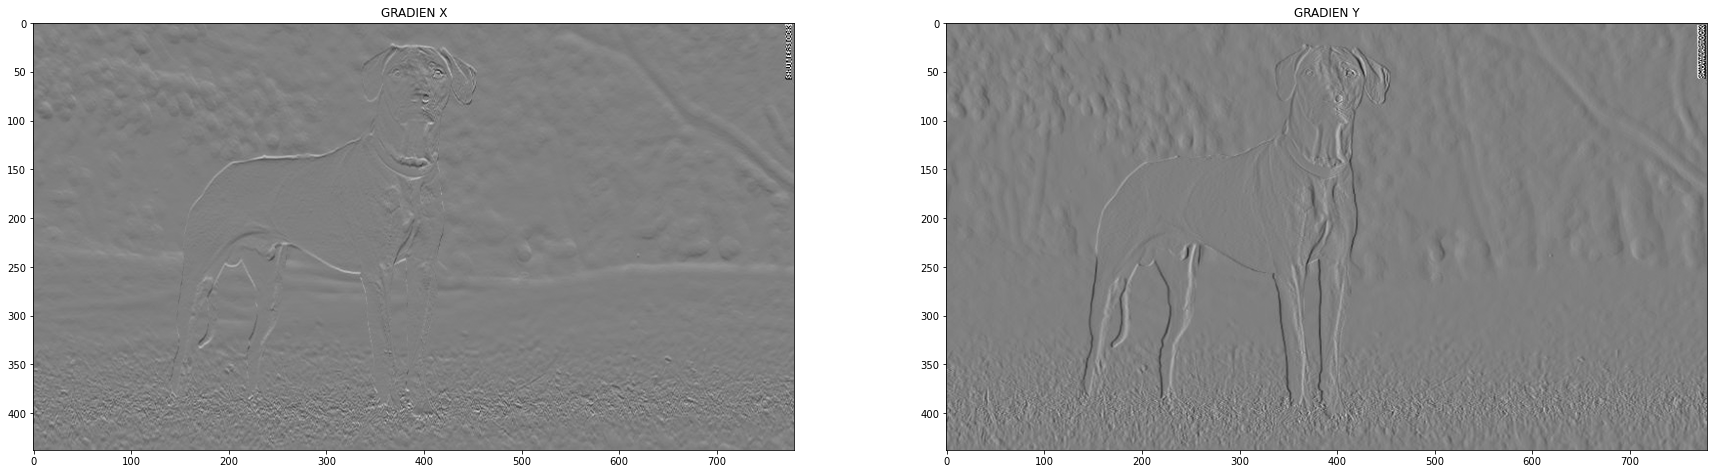

In [130]:
fig = plt.figure(figsize=(30,20))
row = 1
col = 2

fig.add_subplot(row, col, 1)
plt.imshow(dx, cmap='gray')
plt.title('GRADIEN X')

fig.add_subplot(row, col, 2)
plt.imshow(dy, cmap='gray')
plt.title('GRADIEN Y')

Berikut adalah tampilan gambar berdasarkan gradien x dan y. Pada gambar kiri (gradien x) bisa dilihat kalau ke arah sumbu x gambar terlihat lebih timbul, sedangkan pada gambar yang kanan, gambar lebih terlihat timbul pada sumbu y.

----------------

### Mencari Gradient Magnitude

In [131]:
mag = np.sqrt(dx**2 + dy**2)
mag

array([[  9.01893373,   9.65670368,   8.14723494, ...,   2.56443925,
         18.87972903,  25.55130929],
       [ 10.2409    ,  10.30683406,   8.78047638, ...,   6.97585591,
          4.76477677,  27.49243488],
       [  8.75442845,   9.00921523,   7.91304909, ..., 107.27466717,
         15.15356919,  31.35936361],
       ...,
       [  6.51416306,   8.24730339,   9.7548047 , ...,   2.34391993,
          2.85409234,   4.09470767],
       [  7.02692283,   8.42644818,   8.54743193, ...,   5.00590036,
          5.38398974,   5.58581479],
       [  7.00301253,   9.00198783,   8.93703455, ...,   5.23731271,
          6.69681802,   7.41762456]])

Tahap diatas adalah menghitung nilai gradient magnitude

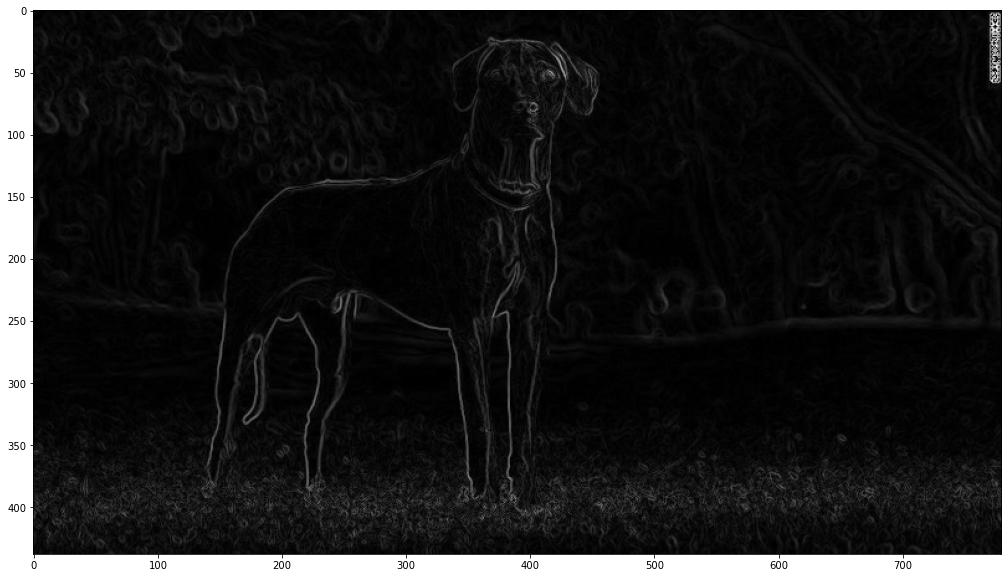

In [132]:
fig = plt.figure(figsize=(20,10))
plt.imshow(mag, cmap='gray')

Berikut adalah hasil dari pemrosesan gambar magnitude untuk memunculkan edge gambar

In [133]:
#menghitung jumlah magnitude yang lebih dari 30
np.count_nonzero(mag>30)

9090

In [134]:
t30 = np.where(mag>30,mag,0) #kalau mau dibalik warnanya, bisa diganti nilai 0 dengan nilai magnitude maximum
t30

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 107.27466717,
          0.        ,  31.35936361],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Tahap diatas untuk melihat matriks dari threshold 30 gambar

In [135]:
t15 = np.where(mag>15,mag,0)
t15

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
         18.87972903,  25.55130929],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  27.49243488],
       [  0.        ,   0.        ,   0.        , ..., 107.27466717,
         15.15356919,  31.35936361],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Tahap diatas untuk melihat matriks dari threshold 15 gambar

In [136]:
t50 = np.where(mag>50,mag,0)
t50

array([[  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ..., 107.27466717,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

Tahap diatas untuk melihat matriks dari threshold 50 gambar

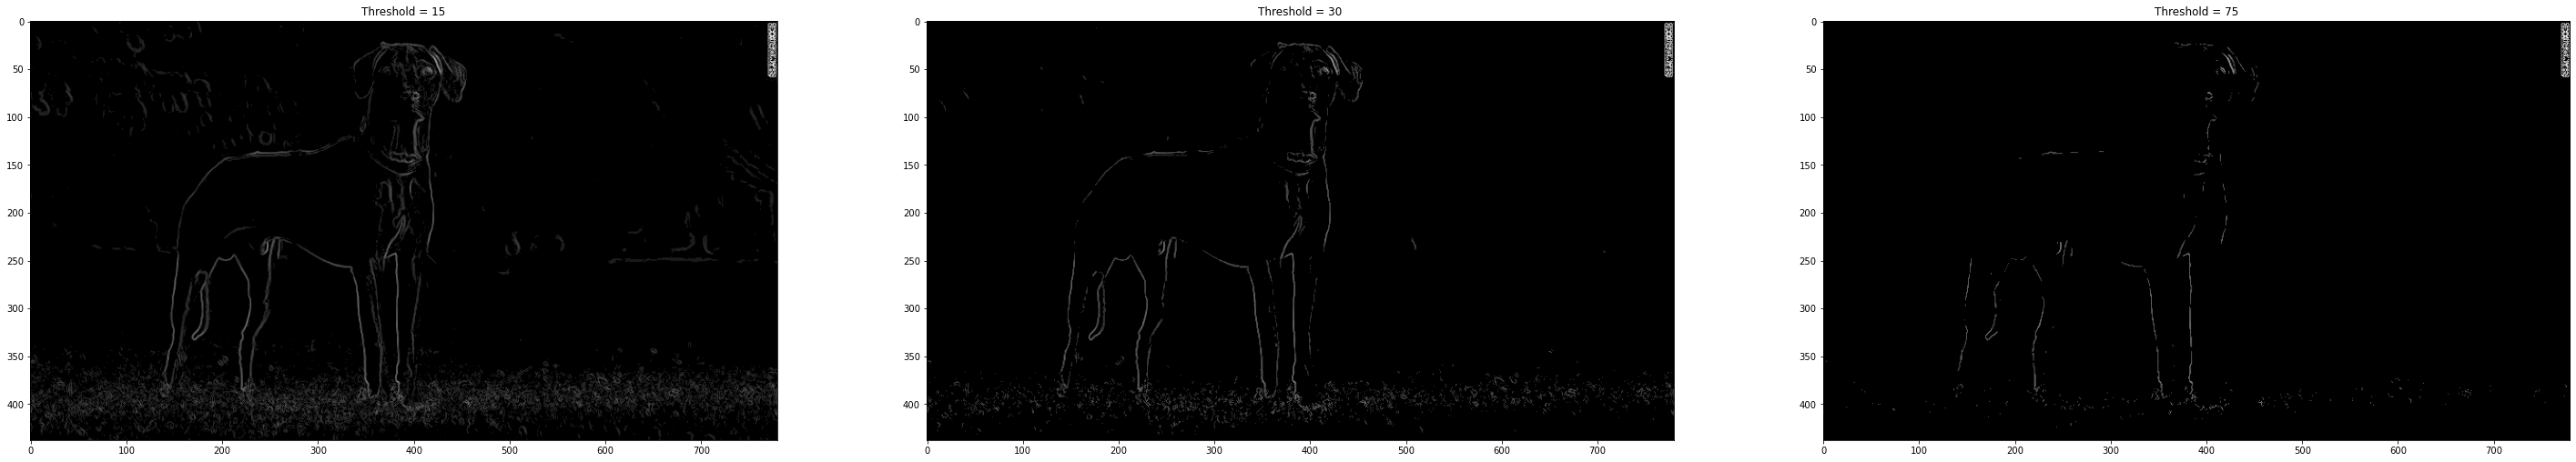

In [137]:
fig = plt.figure(figsize=(50,25))
row = 1
col = 3

fig.add_subplot(row, col, 1)
plt.imshow(t15, cmap = 'gray')
plt.title('Threshold = 15')

fig.add_subplot(row, col, 2)
plt.imshow(t30, cmap = 'gray')
plt.title('Threshold = 30')

fig.add_subplot(row,  col, 3)
plt.imshow(t50, cmap = 'gray')
plt.title('Threshold = 75')

plt.show()

Berikut adalah sandingan dari percobaan ketiga threshold (15,30,50)

### KESIMPULAN
Semakin kecil nilai threshold maka semakin banyak edge yang terdeteksi, yang berarti semakin sedikit juga noise gambar yang terhapus

Pada persoalan gambar diatas, threshold 15 lebih baik dibandingkan yang lain karena masih mempertahankan edge dari objek utama walaupun masih banyak noise yang terdeteksi.

# Perkalian Matriks

In [138]:
matrandom = np.random.rand(780,438)

Pembuatan matriks random sesuai dengan ukuran dengan matriks

In [139]:
tesmatr = t15 @ matrandom
tesmatr

array([[ 92.97677468,  81.1211942 , 115.51503719, ...,  79.47222799,
        127.0978666 , 115.16425195],
       [ 31.34351889,  32.29030686,  52.18339472, ...,  42.32637822,
         64.22032244,  81.4850891 ],
       [341.20496673, 490.83127781, 350.52752144, ..., 337.62480317,
        330.20661869, 401.28980736],
       ...,
       [448.52551405, 366.98368137, 443.83371637, ..., 405.29527111,
        437.70265917, 425.8535138 ],
       [395.46175425, 352.54159253, 331.75411264, ..., 395.19889159,
        374.42707122, 368.45243034],
       [356.75381881, 316.81725733, 297.24441585, ..., 406.33971397,
        353.22670595, 334.61810849]])

In [140]:
tesmatr.shape

(438, 438)

Ukuran dari hasil perkalian matriks threshold 15 dan matriks random

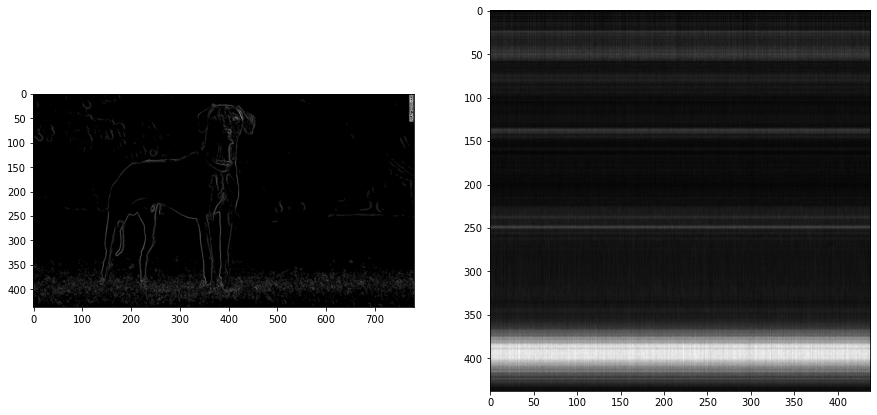

In [141]:
fig = plt.figure(figsize=(15,10))
row = 1
col = 2

fig.add_subplot(row, col, 1)
plt.imshow(t15, cmap = 'gray')

fig.add_subplot(row, col, 2)
plt.imshow(tesmatr, cmap = 'gray')

Hasil dari perkalian matriks kurang lebih menggambarkan pada posisi mana yang banyak terdeteksi edge, bisa dilihat hubungan dari kedua gambar pada sumbu y 50, 250 dan 400 terlihat lebih hitam karena memang banyak terdeteksi edge pada sumbu tersebut.

-------------